In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Library pokok yang digunakan**
* numpy==1.21.6
* scipy
* matplotlib==3.5.3
* pandas==1.3.5
* seaborn
* catboost==1.0.6
* sklearn

In [ ]:
#  !pip freeze > requirements.txt

#### **Pemisahan notebook dilakukan karena tidak bisa di-*runing* sekaligus, selalu crash karena beban RAM yang melebihi batas. Untuk menjalankan kode ini disarankan menggunakan cloud atau PC dengan ram >= 16 GB atau GPU >=4GB**

### Tabel of Content

1. Data Preparation
2. Data Cleansing
3. Exploratory Data Analysis
4. Feature Engineering
5. Modeling
6. Evaluation


# 1. Data Preparation

## 1.1 Load Data

Data yang digunakan hanyalah data sampling yang berjumlah 11.4 juta record hal ini dikarenakan beban komputasi yang sangat berat dan berkali-kali gagal saat melakukan join

In [ ]:
# Downloading Train Data from Gdrive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1DuSitTMojYmEhFoLA9jQT9jKI96kOmF2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1DuSitTMojYmEhFoLA9jQT9jKI96kOmF2" -O train.csv && rm -rf /tmp/cookies.txt

--2022-10-12 03:40:59--  https://docs.google.com/uc?export=download&confirm=t&id=1DuSitTMojYmEhFoLA9jQT9jKI96kOmF2
Resolving docs.google.com (docs.google.com)... 74.125.31.139, 74.125.31.102, 74.125.31.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.31.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sam0ftej6diqo02tuuueu2fuifqgn02o/1665546000000/12463189437916965899/*/1DuSitTMojYmEhFoLA9jQT9jKI96kOmF2?e=download&uuid=ced6508a-0a33-4219-8aff-dc5169c9d2f3 [following]
--2022-10-12 03:41:00--  https://doc-0o-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sam0ftej6diqo02tuuueu2fuifqgn02o/1665546000000/12463189437916965899/*/1DuSitTMojYmEhFoLA9jQT9jKI96kOmF2?e=download&uuid=ced6508a-0a33-4219-8aff-dc5169c9d2f3
Resolving doc-0o-bg-docs.googleusercontent.com (doc-0o-bg-docs.googleusercontent.com)... 173.194.216.132, 260

In [ ]:
#Download Test Data
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1p5KlzhTSJOLT3MKDoQAQMBRp_drKn_4v' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1p5KlzhTSJOLT3MKDoQAQMBRp_drKn_4v" -O test.csv && rm -rf /tmp/cookies.txt

--2022-10-12 03:41:08--  https://docs.google.com/uc?export=download&confirm=t&id=1p5KlzhTSJOLT3MKDoQAQMBRp_drKn_4v
Resolving docs.google.com (docs.google.com)... 74.125.31.102, 74.125.31.101, 74.125.31.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.31.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7rojqea1dr9qgfdncj8vlak4tdjvctlj/1665546000000/12463189437916965899/*/1p5KlzhTSJOLT3MKDoQAQMBRp_drKn_4v?e=download&uuid=b089e8a6-a01d-4016-9c97-c7a6210e9ab5 [following]
--2022-10-12 03:41:09--  https://doc-00-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7rojqea1dr9qgfdncj8vlak4tdjvctlj/1665546000000/12463189437916965899/*/1p5KlzhTSJOLT3MKDoQAQMBRp_drKn_4v?e=download&uuid=b089e8a6-a01d-4016-9c97-c7a6210e9ab5
Resolving doc-00-bg-docs.googleusercontent.com (doc-00-bg-docs.googleusercontent.com)... 173.194.216.132, 260

## 1.2 Import Data

In [ ]:
train=pd.read_csv("./train.csv")
train.sample(5)

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
7517590,8415261,3898914,146,B,32,L,1.0,2019-06-17T17:00:00.000Z,2019-06-17T17:00:00.000Z,2,...,196500.0,1.0,F-5-14-0,3,None,None,None,None,None,0
11221870,778336,6818373,76,C,30,P,1.0,2019-02-17T17:00:00.000Z,2019-02-17T17:00:00.000Z,2,...,192700.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
8536844,6373410,1369025,97,KJ,31,L,4.0,2019-05-15T17:00:00.000Z,2019-06-17T17:00:00.000Z,1,...,3986800.0,1.0,F-4-10-I,3,None,None,None,None,None,0
2878602,7704520,8149400,124,SC,0,P,4.0,2019-09-05T17:00:00.000Z,2019-09-08T17:00:00.000Z,1,...,4796700.0,1.0,P-8-17-I,1,None,None,None,None,None,0
643266,9325745,2009113,184,B,79,L,1.0,2019-02-15T17:00:00.000Z,2019-02-16T17:00:00.000Z,1,...,5329100.0,1.0,K-1-14-I,3,None,None,None,None,None,0


In [ ]:
test=pd.read_csv("./test.csv")
test.sample(5)

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,diagfktp,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd
533728,224923,507946,138,SC,31,L,2.0,2020-05-15T17:00:00.000Z,2020-05-15T17:00:00.000Z,2,...,A16.0,190400.0,1.0,Q-5-44-0,3,None,None,None,None,None
37677,272980,457489,167,SC,52,P,1.0,2019-04-25T17:00:00.000Z,2019-04-25T17:00:00.000Z,2,...,Z47.8,425200.0,1.0,M-3-11-0,3,None,None,None,None,None
336621,889441,265117,190,C,22,P,4.0,2020-12-11T17:00:00.000Z,2020-12-11T17:00:00.000Z,2,...,Z36.9,183900.0,1.0,Z-3-27-0,3,None,None,None,None,None
499952,800830,843575,179,A,14,P,4.0,2018-11-11T17:00:00.000Z,2018-11-11T17:00:00.000Z,2,...,Z09.0,377100.0,1.0,Q-5-44-0,3,None,None,None,None,None
248228,956500,295899,309,A,54,L,1.0,2018-09-16T17:00:00.000Z,2018-09-16T17:00:00.000Z,2,...,D21.4,381600.0,1.0,Q-5-44-0,3,None,None,None,None,None


In [ ]:
train.columns

Index(['id', 'id_peserta', 'dati2', 'typefaskes', 'usia', 'jenkel', 'pisat',
       'tgldatang', 'tglpulang', 'jenispel', 'politujuan', 'diagfktp', 'biaya',
       'jenispulang', 'cbg', 'kelasrawat', 'kdsa', 'kdsp', 'kdsr', 'kdsi',
       'kdsd', 'label'],
      dtype='object')

In [ ]:
test.columns

Index(['id', 'id_peserta', 'dati2', 'typefaskes', 'usia', 'jenkel', 'pisat',
       'tgldatang', 'tglpulang', 'jenispel', 'politujuan', 'diagfktp', 'biaya',
       'jenispulang', 'cbg', 'kelasrawat', 'kdsa', 'kdsp', 'kdsr', 'kdsi',
       'kdsd'],
      dtype='object')

## 1.3 Membuat Id_Peserta baru Sebagai Peserta_Unik

Setelah melakukan perbandingan antara data train yang diberikan pada tahap 1 dengan data test yang diberikan pada tahap 2 didapati bahwa terdapat ketidakcocokan data peserta pada id_peserta yang sama. Penulis menduga bahwa id_peserta pada data train dan test dienkripsi secara terpisah sehingga menimbulkan ketidakcocokan. **Menurut penulis, id_peserta itu penting karena kita bisa melacak kebiasaan dari orang tersebut dalam mengklaim bpjs apakah sering melakukan fraud atau tidak**

Feature peserta unik adalah gabungan dari feature yang mencirikan 1 peserta bpjs yaitu gabungan dari feature dati2, typefaskes, usia, jenkel, pisat, dan kelas rawat

In [ ]:
# Menghapus spasi setelah tipefaskes
test['typefaskes']=test['typefaskes'].str.rstrip()

In [ ]:
#Dimaksudkan agar umur peserta tertentu seragam pada tahun 2020
train["usia_2020"] = 2020 - (train["tgldatang"].str[0:4].astype(int) - train["usia"])
test["usia_2020"] = 2020 - (test["tgldatang"].str[0:4].astype(int) - test["usia"])

In [ ]:
#Membuat Fitur Baru pada data train
train["peserta_unik"] = train["dati2"].astype(str) + train["typefaskes"].astype(str) + train["usia_2020"].astype(str)  + train["jenkel"].astype(str) + train["pisat"].astype(str) + train["kelasrawat"].astype(str)  

In [ ]:
#Membuat Fitur Baru pada data tes
test["peserta_unik"] = test["dati2"].astype(str) + test["typefaskes"].astype(str) + test["usia_2020"].astype(str)  + test["jenkel"].astype(str) + test["pisat"].astype(str) + test["kelasrawat"].astype(str)

## 1.4 Melihat Data yang Hilang

In [ ]:
#Melihat data yang hilang
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [ ]:
missing_percentage(train)

,Total,Percent
politujuan,4041455,35.45
kdsa,198670,1.74
kdsi,198463,1.74
kdsr,198459,1.74
kdsp,197007,1.73
kdsd,195181,1.71
biaya,57815,0.51
diagfktp,2530,0.02
pisat,190,0.00
jenkel,49,0.00


In [ ]:
missing_percentage(test)

,Total,Percent
politujuan,108148,10.83
kdsa,20804,2.08
kdsr,20803,2.08
kdsd,20789,2.08
kdsi,20785,2.08
kdsp,20732,2.08
biaya,5049,0.51
diagfktp,64,0.01
jenkel,6,0.00
pisat,6,0.00


## 1.5 Melihat Nilai Unik

In [ ]:
#Mengitung nilai yang unik
for col in train.columns:
    print('Nilai unik pada feature', col, 'adalah')
    print(train[col].value_counts())
    print('\n')

Nilai unik pada feature id adalah
3966586     4
8603080     2
3481090     2
10749999    2
11146119    2
           ..
984996      1
8658768     1
6481061     1
6109477     1
102794      1
Name: id, Length: 11401868, dtype: int64


Nilai unik pada feature id_peserta adalah
5460422    236
5676434    230
5676435    219
4490519    216
3373373    203
          ... 
4654308      1
4654271      1
4654193      1
4654083      1
8527876      1
Name: id_peserta, Length: 8527919, dtype: int64


Nilai unik pada feature dati2 adalah
113    293414
217    253418
135    217038
38     209744
90     178315
        ...  
528       132
517        61
366        15
527         9
479         1
Name: dati2, Length: 489, dtype: int64


Nilai unik pada feature typefaskes adalah
SC    3165558
C     2197424
B     2102708
SD     825690
SB     808444
A      493055
I3     285780
D      260327
I2     226470
KI     221114
KM     177017
KJ     173692
I4     164106
KL     101933
I1      49979
KC      28917
KB      25479


In [ ]:
#Mengitung nilai yang unik
for col in test.columns:
    print('Nilai unik pada feature', col, 'adalah')
    print(test[col].value_counts())
    print('\n')

Nilai unik pada feature id adalah
847218    1
249330    1
264585    1
916777    1
323778    1
         ..
432686    1
509374    1
16383     1
962158    1
518598    1
Name: id, Length: 998941, dtype: int64


Nilai unik pada feature id_peserta adalah
603968    8
619203    7
662608    7
434047    7
229725    7
         ..
177723    1
772177    1
758002    1
275558    1
722671    1
Name: id_peserta, Length: 926413, dtype: int64


Nilai unik pada feature dati2 adalah
217    34049
113    27154
135    22498
173    21687
114    19436
       ...  
503        8
526        8
40         5
517        2
366        1
Name: dati2, Length: 487, dtype: int64


Nilai unik pada feature typefaskes adalah
SC    298836
B     192715
C     159246
SB     93595
SD     65847
A      49826
I3     22196
I2     21499
KM     15151
D      14781
KI     11048
I4     10747
KL      9072
KJ      7950
I1      7897
HD      3056
KO      2695
KP      2611
KC      2350
KB      2169
GD      1859
KG      1513
SA      1152
KT      

In [ ]:
# #Mengitung nilai yang unik
# for col in diagnosa.columns:
#     print('Nilai unik pada feature', col, 'adalah')
#     print(diagnosa[col].value_counts())
#     print('\n')

In [ ]:
# #Mengitung nilai yang unik
# for col in prosedur.columns:
#     print('Nilai unik pada feature', col, 'adalah')
#     print(prosedur[col].value_counts())
#     print('\n')

In [ ]:
train.sample(5)

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label,usia_2020,peserta_unik
4278238,858819,1383413,90,KP,50,P,3.0,2018-09-09T17:00:00.000Z,2018-09-09T17:00:00.000Z,2,...,Q-5-44-0,3,None,None,None,None,None,0,52,90KP52P3.03
1275414,11360417,3409997,383,I3,63,P,3.0,2018-08-19T17:00:00.000Z,2018-08-19T17:00:00.000Z,2,...,Z-3-23-0,3,None,None,None,None,None,0,65,383I365P3.03
7508733,10898886,3441073,232,SC,38,P,3.0,2018-10-29T17:00:00.000Z,2018-10-29T17:00:00.000Z,2,...,Q-5-42-0,3,None,None,None,None,None,0,40,232SC40P3.03
8412694,3097469,2991129,159,SD,43,L,1.0,2020-05-26T17:00:00.000Z,2020-05-28T17:00:00.000Z,1,...,A-4-14-I,2,None,None,None,None,None,0,43,159SD43L1.02
10899707,5610812,5873070,69,B,44,P,3.0,2018-01-16T17:00:00.000Z,2018-01-16T17:00:00.000Z,2,...,Q-5-44-0,3,NaN,NaN,NaN,NaN,NaN,0,46,69B46P3.03


In [ ]:
test.sample(5)

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,usia_2020,peserta_unik
729112,788339,872965,158,B,38,P,1.0,2020-04-14T17:00:00.000Z,2020-04-14T17:00:00.000Z,2,...,1.0,Q-5-44-0,3,None,None,None,None,None,38,158B38P1.03
692332,143661,473245,117,SB,65,L,1.0,2018-12-16T17:00:00.000Z,2018-12-16T17:00:00.000Z,2,...,1.0,Q-5-44-0,3,None,None,None,None,None,67,117SB67L1.03
516975,108428,574365,112,B,50,L,1.0,2018-06-24T17:00:00.000Z,2018-06-24T17:00:00.000Z,2,...,1.0,Z-3-12-0,3,None,None,None,None,None,52,112B52L1.03
88605,62779,180246,82,C,22,L,4.0,2018-03-04T17:00:00.000Z,2018-03-08T17:00:00.000Z,1,...,1.0,A-4-15-II,3,None,None,None,None,None,24,82C24L4.03
245871,453986,14851,53,SD,55,P,1.0,2018-07-27T17:00:00.000Z,2018-07-27T17:00:00.000Z,2,...,1.0,Q-5-44-0,3,None,None,None,None,None,57,53SD57P1.03


## 1.6 Mengubah tipe data tanggal menjadi datetime

In [ ]:
# Mengubah tipe data tanggal datang dan pulang
train["tgldatang"] = pd.to_datetime(train["tgldatang"], format='%Y-%m-%dT%H:%M:%S.%f%z')
train["tglpulang"] = pd.to_datetime(train["tglpulang"], format='%Y-%m-%dT%H:%M:%S.%f%z')

# Mengubah tipe data tanggal datang dan pulang
test["tgldatang"] = pd.to_datetime(test["tgldatang"], format='%Y-%m-%dT%H:%M:%S.%f%z')
test["tglpulang"] = pd.to_datetime(test["tglpulang"], format='%Y-%m-%dT%H:%M:%S.%f%z')

## 1.7 Menambahkan variabel lama_rawat

In [ ]:
train["lama_rawat"] = (train["tglpulang"]-train["tgldatang"]).dt.days.astype(int)
test["lama_rawat"] = (test["tglpulang"]-test["tgldatang"]).dt.days.astype(int)

## 1.8 Menjadikan kapital pada politujuan dan diagfktp

In [ ]:
train["politujuan"]=train["politujuan"].str.upper()
test["politujuan"]=test["politujuan"].str.upper()

train["diagfktp"]=train["diagfktp"].str.upper()
test["diagfktp"]=test["diagfktp"].str.upper()

# 2. Data Cleansing

## 2.1 Menangani NaN

In [ ]:
# Mengisi nilai NaN pada biaya dengan 0
train["biaya"] = train["biaya"].fillna(0)
# Mengisi nilai NaN pada biaya dengan 0
test["biaya"] = test["biaya"].fillna(0)

# Mengisi nilai NaN pada pisat dengan nilai modus yaitu 1.0
train["pisat"] = train["pisat"].fillna(1.0)
# Mengisi nilai NaN pada pisat dengan nilai modus yaitu 1.0
test["pisat"] = test["pisat"].fillna(1.0)

# Mengisi nilai NaN pada jenkel dengan nilai modus yaitu P
train["jenkel"] = train["jenkel"].fillna("P")
# Mengisi nilai NaN pada jenkel dengan nilai modus yaitu P
test["jenkel"] = test["jenkel"].fillna("P")

# Mengisi nilai NaN pada jenkel dengan nilai modus yaitu 1
train["jenispulang"] = train["jenispulang"].fillna(1)
# Mengisi nilai NaN pada jenkel dengan nilai modus yaitu 1
test["jenispulang"] = test["jenispulang"].fillna(1)

In [ ]:
# Mengisi nilai NaN pada kolom lain dengan none
train = train.fillna("None")
# Mengisi nilai NaN pada kolom lain dengan none
test = test.fillna("None")

# 3. Exploratory Data Analysis

## 3.1 Kategorikal

<AxesSubplot:xlabel='label', ylabel='count'>

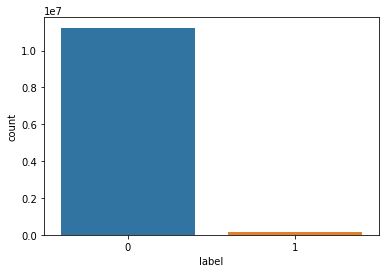

In [ ]:
sns.countplot(x='label',data=train)

label,0,1
jenkel,,
L,0.985784,0.014216
P,0.986628,0.013372


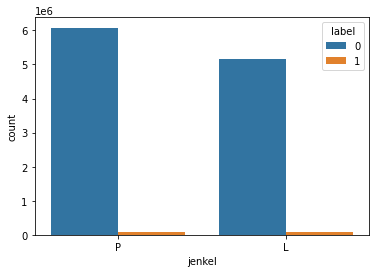

In [ ]:
sns.countplot(x='jenkel', hue='label', data=train)
pd.crosstab(train.jenkel, train.label, normalize='index').sort_values(1, ascending=False)

label,0,1
jenispulang,,
2.0,0.981719,0.018281
3.0,0.986078,0.013922
1.0,0.986255,0.013745
4.0,0.987907,0.012093
5.0,0.991317,0.008683


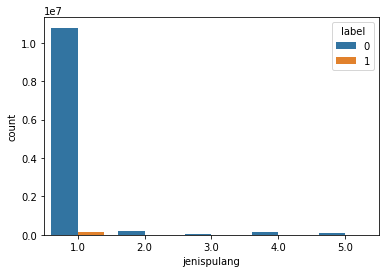

In [ ]:
sns.countplot(x='jenispulang', hue='label', data=train)
pd.crosstab(train.jenispulang, train.label, normalize='index').sort_values(1, ascending=False)

label,0,1
kelasrawat,,
2,0.983389,0.016611
1,0.985824,0.014176
3,0.986542,0.013458


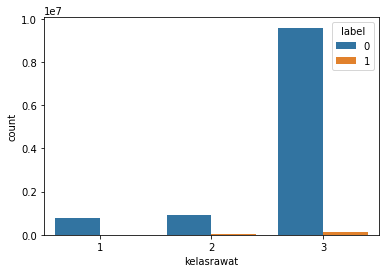

In [ ]:
sns.countplot(x='kelasrawat', hue='label', data=train)
pd.crosstab(train.kelasrawat, train.label, normalize='index').sort_values(1, ascending=False)

label,0,1
jenispel,,
2,0.985963,0.014037
1,0.986745,0.013255


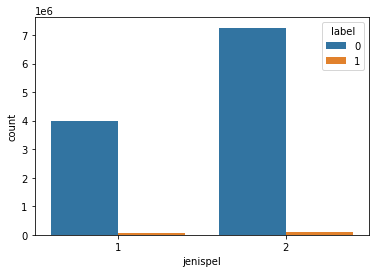

In [ ]:
sns.countplot(x='jenispel', hue='label', data=train)
pd.crosstab(train.jenispel, train.label, normalize='index').sort_values(1, ascending=False)

label,0,1
pisat,,
5.0,0.984199,0.015801
4.0,0.984649,0.015351
2.0,0.986711,0.013289
1.0,0.986957,0.013043
3.0,0.987315,0.012685


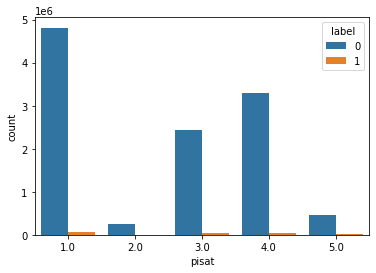

In [ ]:
sns.countplot(x='pisat', hue='label', data=train)
pd.crosstab(train.pisat, train.label, normalize='index').sort_values(1, ascending=False)

label,0,1
typefaskes,,
KM,0.962410,0.037590
GD,0.970775,0.029225
D,0.979595,0.020405
KI,0.981421,0.018579
I1,0.981532,0.018468
C,0.983878,0.016122
KB,0.984105,0.015895
SD,0.984151,0.015849
B,0.985548,0.014452


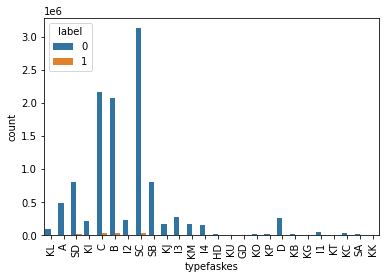

In [ ]:
sns.countplot(x='typefaskes', hue='label', data=train)
plt.xticks(rotation=90)
pd.crosstab(train.typefaskes, train.label, normalize='index').sort_values(1, ascending=False)

In [ ]:
pd.crosstab(train.politujuan, train.label, normalize='index').sort_values(1, ascending=False)

label,0,1
politujuan,,
URL,0.000000,1.000000
BAN,0.600000,0.400000
DIG,0.750000,0.250000
ANT,0.835341,0.164659
146,0.875000,0.125000
...,...,...
041,1.000000,0.000000
144,1.000000,0.000000
IVP,1.000000,0.000000


In [ ]:
ct=pd.crosstab(train.cbg, train.label, normalize='index').sort_values(1, ascending=False)
ct[ct[1]>=0.5]

label,0,1
cbg,,
B-1-01-I,0.000000,1.000000
U-2-11-0,0.000000,1.000000
V-2-10-0,0.000000,1.000000
G-2-31-0,0.294118,0.705882
M-2-64-0,0.411765,0.588235
B-2-11-0,0.500000,0.500000
J-2-10-0,0.500000,0.500000
M-2-21-0,0.500000,0.500000
Q-5-15-0,0.500000,0.500000


In [ ]:
ct = pd.crosstab(train.diagfktp, train.label, normalize='index').sort_values(1, ascending=False)
ct[ct[1]>=0.5]

label,0,1
diagfktp,,
Y89.0,0.000000,1.000000
Y74.0,0.000000,1.000000
W03.1,0.000000,1.000000
J67.1,0.000000,1.000000
M21.72,0.000000,1.000000
M43.51,0.000000,1.000000
Y64,0.000000,1.000000
Y65,0.000000,1.000000
D63.1,0.000000,1.000000


In [ ]:
pd.crosstab(train.dati2, train.label, normalize='index').sort_values(1, ascending=False)

label,0,1
dati2,,
528,0.742424,0.257576
483,0.868594,0.131406
364,0.876754,0.123246
466,0.891204,0.108796
245,0.898135,0.101865
...,...,...
102,0.998335,0.001665
269,0.998656,0.001344
39,0.998795,0.001205


Pada tahap EDA pada data kategorik didapat hal-hal berikut :
* Terjadi imbalance pada label target yaitu fraud. Pada dataset data dengan label 0 lebih banyak dibanding data dengan label 1 dengan perbandingan yang sangat sigifikan ~72:1
* Pasien laki-laki lebih cenderung melakukan fraud dibanding pasien perempuan
* Pasien dengan jenis pulang kategori 2 memiliki kemungkinan melakukan fraud terbesar
* Pasien dengan kelas rawat 2 memiliki kemungkinan melakukan fraud terbesar
* Pasien dengan jenis pelayanan kategori 2 memiliki kemungkinan melakukan fraud terbesar
* Pasien dengan pisat 4 dan 5 memiliki kemungkinan fraud terbesar
* Pasien dengan tipe faskes KM, GD, D, KI dan I1 memiliki kemungkinan fraud terbesar
* 100% pasien dengan poli tujuan URL melakukan fraud, 40% pasien dengan poltujuan BAN melakukan fraud, 25% pasien dengan poli tujuan DIG melakukan fraud, 16% pasien dengan poli tujuan ANT melakukan fraud
* 50-100% pasien dari cbg B-1-01-I, U-2-11-0, V-2-10-0, G-2-31-0, M-2-64-0, B-2-11-0 , J-2-10-0, M-2-21-0, Q-5-15-0 melakukan fraud
* 100% pasien dengan diagfktp Y89.0, Y74.0, W03.1, J67.1, M21.72, M43.51, Y64, Y65, D63.1, M23.14, I889, Z65.5, S056,M65.41, X94, J441, V13.9, M99.34, Y48.3, M83.00, D83.1, M05.21, W14.2, W41.1, L910, dan M46.59 melakukan fraud
* dati2 dengan kode 528 merupakan dati2 yang memiliki kemungkinan fraud terbesar dengan presentase 25%


## 3.2 Numerikal

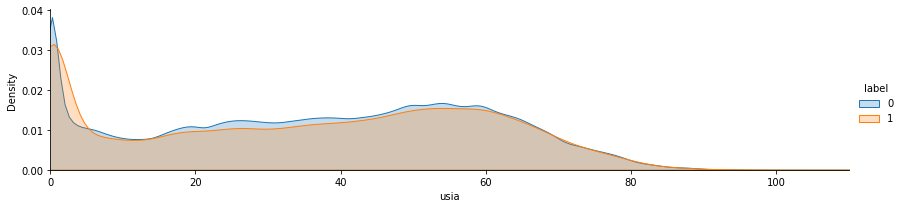

In [ ]:
#Usia
a = sns.FacetGrid( train, hue = 'label', aspect=4 )
a.map(sns.kdeplot, 'usia', shade= True )
a.set(xlim=(0 , train['usia'].max()))
a.add_legend()

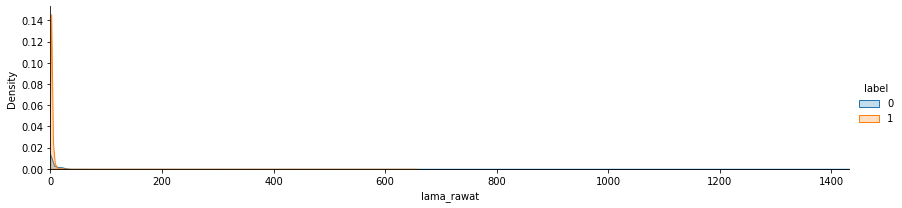

In [ ]:
#Lama Rawat
a = sns.FacetGrid( train, hue = 'label', aspect=4 )
a.map(sns.kdeplot, 'lama_rawat', shade= True )
a.set(xlim=(0 , train['lama_rawat'].max()))
a.add_legend()

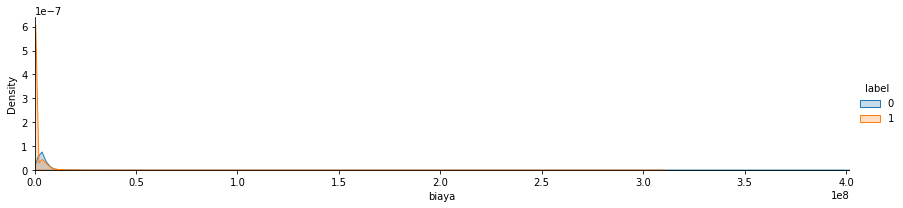

In [ ]:
#Biaya
a = sns.FacetGrid( train, hue = 'label', aspect=4 )
a.map(sns.kdeplot, 'biaya', shade= True )
a.set(xlim=(0 , train['biaya'].max()))
a.add_legend()

In [ ]:
train[(train["biaya"]==0)&train["label"]==1].shape[0]/train[(train["biaya"]==0)].shape[0]

0.9520409796702417

In [ ]:
train[(train["biaya"]==0)&train["label"]==1].shape[0]/train[(train["label"]==1)].shape[0]

0.3790833009325064

Pada tahap EDA pada data numerik didapat hal-hal berikut :
* Fraud banyak terjadi pada pasien dengan usia 2-7 tahun
* Fraud banyak terjadi pada pasien dengan lama rawat dengan durasi yang rendah
* Fraud banyak terjadi pada pasien yang memerlukan biaya yang tidak terlalu banyak
* 95.2% transaksi yang mempunyai biaya = 0 adalah fraud
* 37.9% transaksi yang dilabeli fraud mempunyai biaya = 0

# 4. Feature Enginering

In [ ]:
data = pd.concat([train,test])

## 4.1 Melakukan Label Encoder kepada Variabel Kategorik

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11401882 entries, 0 to 11401881
Data columns (total 25 columns):
 #   Column        Dtype              
---  ------        -----              
 0   id            int64              
 1   id_peserta    int64              
 2   dati2         int64              
 3   typefaskes    object             
 4   usia          int64              
 5   jenkel        object             
 6   pisat         float64            
 7   tgldatang     datetime64[ns, UTC]
 8   tglpulang     datetime64[ns, UTC]
 9   jenispel      int64              
 10  politujuan    object             
 11  diagfktp      object             
 12  biaya         float64            
 13  jenispulang   float64            
 14  cbg           object             
 15  kelasrawat    int64              
 16  kdsa          object             
 17  kdsp          object             
 18  kdsr          object             
 19  kdsi          object             
 20  kdsd          object  

In [ ]:
cat_=['typefaskes','jenkel', 'politujuan', 'diagfktp',
     'cbg', 'kdsa', 'kdsp', 'kdsr', 'kdsi','kdsd']

In [ ]:
for x in cat_ :
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    data[x] = labelencoder.fit_transform(data[x])

In [ ]:
train=data[(data["label"]==1) | (data["label"]==0)]
test=data[(data["label"]!=1) & (data["label"]!=0)]

In [ ]:
test = test.drop(columns="label")

## 4.2 Menambahkan fitur probability_inefficienty dari setiap peserta

probability_inefficency merupakan kemungkinan pasien tersebut melakukan fraud. Misalnya pasien dengan peserta_unik 1000 melakukan 3 kali berobat, 1 dari 3 kali pengobatan tersebut terdeteksi fraud, maka probability_inefficiencynya bernilai 0.3333

In [ ]:
mean = train['label'].mean()
mean_encode = train.groupby('peserta_unik')['label'].mean()

train['probability_inefficiency'] = train['peserta_unik'].map(mean_encode).fillna(mean)
test['probability_inefficiency'] = test['peserta_unik'].map(mean_encode).fillna(mean)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# prob_ineff = pd.DataFrame()
# prob_ineff["id_peserta"] = mean_encode.index
# prob_ineff["probability_inefficiency"] = train['probability_inefficiency']
# test_ = pd.merge(test,prob_ineff,on='id_peserta',how='left')

## 4.3 Menambahkan fitur biaya per hari dan is_biaya_0

In [ ]:
train["biaya_per_hari"] = train["biaya"]/(train["lama_rawat"]+1)
test["biaya_per_hari"] = test["biaya"]/(test["lama_rawat"]+1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Berdasarkan EDA biaya 0 cenderung melakukan fraud

a = np.array(train['biaya'].values.tolist())
b = np.array(test['biaya'].values.tolist())

train["is_biaya_0"] = np.where(a == 0, 1, 0).tolist()
test["is_biaya_0"] = np.where(b == 0, 1, 0).tolist()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train[(train["biaya"]==0)&train["label"]==1].shape[0]/train[(train["biaya"]==0)].shape[0]

0.9520409796702417

In [ ]:
train[(train["biaya"]==0)&train["label"]==1].shape[0]/train[(train["label"]==1)].shape[0]

0.3790833009325064

## 4.4 Melihat korelasi antar fitur

In [ ]:
pd.DataFrame((abs(train.corr()['label']).sort_values(ascending = False)))

,label
label,1.000000
is_biaya_0,0.597825
probability_inefficiency,0.371094
biaya_per_hari,0.015216
biaya,0.013566
usia,0.011001
typefaskes,0.010546
id_peserta,0.010491
usia_2020,0.010407
politujuan,0.008910


is_biaya_0 memiliki korelasi tertinggi dengan label fraud atau tidak, disusul probability_inefficiency , biaya, biaya perhari, usia, cabang, dan lama rawat. 

## 4.5 Menguji pengaruh fitur numerik terhadap fitur target

In [ ]:
num = ["probability_inefficiency","biaya","lama_rawat","usia","biaya_per_hari"]

train_num = train[num]

In [ ]:
#ANOVA test
from sklearn.feature_selection import f_classif

f_score, p_value = f_classif(train_num,train["label"])

In [ ]:
f_test = pd.DataFrame()
f_test["Variabel"] = train_num.columns
f_test["f_score"] = f_score
f_test["p_value"] = p_value
f_test = f_test.sort_values(by=["f_score"],ascending=False)
f_test

# # # Hasil nilai F-Score
# # sns.barplot(x ='f_score', y='Variabel',data = f_test)

,Variabel,f_score,p_value
0,probability_inefficiency,1.820927e+06,0.000000e+00
4,biaya_per_hari,2.640556e+03,0.000000e+00
1,biaya,2.098759e+03,0.000000e+00
3,usia,1.380077e+03,4.676804e-302
2,lama_rawat,6.972652e+02,1.188615e-153


* H0 : variable x tidak memiliki hubungan dengan variabel y (label)
* H1 : variable x memiliki hubungan dengan variabel y (label)

Karena p-value <0.05 semua variabel numerik dipakai dalam pemodelan

## 4.5 Menguji pengaruh fitur kategorik terhadap fitur target

In [ ]:
cat = ['dati2','kelasrawat','jenispulang',
       'pisat','jenispel','typefaskes','jenkel', 'politujuan', 'diagfktp',
       'cbg', 'kdsa', 'kdsp', 'kdsr',
       'kdsd','kdsi','is_biaya_0']
train_cat = train[cat]

In [ ]:
# Chi-Square Test

from sklearn.feature_selection import chi2

chi_score, p_value = chi2(train_cat,train["label"])

In [ ]:
chi_test = pd.DataFrame()
chi_test["Variabel"] = train_cat.columns
chi_test["chi_score"] = chi_score
chi_test["p_value"] = p_value
chi_test = chi_test.sort_values(by=["chi_score"],ascending=False)
chi_test

,Variabel,chi_score,p_value
15,is_biaya_0,4.052647e+06,0.000000e+00
8,diagfktp,1.277221e+06,0.000000e+00
9,cbg,9.129081e+04,0.000000e+00
0,dati2,3.627014e+04,0.000000e+00
5,typefaskes,1.162680e+04,0.000000e+00
7,politujuan,5.767348e+03,0.000000e+00
3,pisat,5.300037e+02,2.819369e-117
10,kdsa,2.802563e+02,6.603144e-63
12,kdsr,1.600653e+02,1.094942e-36
6,jenkel,6.841833e+01,1.322425e-16


* H0 : variable x tidak memiliki hubungan dengan variabel y (label)
* H1 : variable x memiliki hubungan dengan variabel y (label)

Karena p-value <0.05 semua variabel kategorik dipakai dalam pemodelan kecuali **kdsi** (p-value = 0.9 > 0.05)

## 4.6 Menyimpan Data Bersih

In [ ]:
selection = cat+num

train_sel = train[selection]
train_sel["label"] = train["label"]

test_sel = test[selection]
test_sel["id"] = test["id"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# train[["peserta_unik","probability_inefficiency","is_biaya_0"]].to_csv("train_prob.csv", index=False)
# test[["peserta_unik","probability_inefficiency","is_biaya_0"]].to_csv("test_prob.csv", index=False)

In [ ]:
# train_sel.to_csv("train_clean.csv", index=False)
# test_sel.to_csv("test_clean.csv", index=False)

In [ ]:
# from IPython.display import FileLink
# FileLink(r'train_clean.csv')

In [ ]:
# from IPython.display import FileLink
# FileLink(r'test_clean.csv')

> Catatan : 
> * Penulis tidak melakukan over atau undersampling untuk menangani imbalance dataset karena penulis akan menggunakan model ensembel (catboost) dimana pada model tersebut terdapat fitur scale_pos_weight yang dapat mengatur bobot dari setiap label
> * Penulis tidak melakukan scaling (MinMax) karena pada tree based model kita tidak memerlukan scaling